In [1]:
import pickle,gzip,math,os,time,shutil,torch,matplotlib as mpl, numpy as np
from pathlib import Path
from torch import tensor
from fastcore.test import test_close
torch.manual_seed(42)

In [3]:
def lin(x, w): 
    return x@w

In [4]:
def relu(x): 
    return x.clamp_min(0.)

In [693]:
import random as rand
import pandas as pd

In [713]:
x = range(-20,20,1)

In [ ]:
data = pd.DataFrame(columns=['x', 'y', 'type'])
df = pd.DataFrame(columns=['x', 'y', 'type'])
df.x=x
for i in range(25):
    data = data.append(df)
data = data.reset_index()
data = data.drop('index', axis=1)

In [715]:
for ind, row in data.iterrows():
    data.loc[ind, 'y'] = int(rand.gauss(row.x**2, 200))

In [716]:
l = list(data.sample(200).index)
data.loc[l, 'type'] = 'test'
data['type'] = data['type'].fillna('train')


In [717]:
x_train = list(data[data.type == 'train'].x)
y_train = list(data[data.type == 'train'].y)
x_valid = list(data[data.type == 'test'].x)
y_valid = list(data[data.type == 'test'].y)

In [718]:
x_train = tensor(x_train, dtype=torch.float)[:,None]
y_train = tensor(y_train, dtype=torch.float)[:,None]
x_valid = tensor(x_valid, dtype=torch.float)[:,None]
y_valid = tensor(y_valid, dtype=torch.float)[:,None]

In [711]:
y_valid.shape

torch.Size([200, 1])

In [356]:
w1 = torch.randn(1,10)
w2 = torch.randn(10,1)

In [720]:
class Model():
    def __init__(self, w1, w2):
        self.w1 = w1
        self.w2 = w2
        
    def forward(self, x):
        self.x = x
        self.l1 = lin(x, self.w1)
        self.l2 = relu(self.l1)
        self.res = lin(self.l2, self.w2)
        return self.res
    
    def loss(self, y):
        self.y = y
        self.diff = self.res-self.y
    
    def backward(self):
        self.w2.g = self.l2.t()@self.diff * 2 / self.l2.shape[0]
        self.w1.g = self.x.t()@(self.diff@self.w2.t() * (self.l1>0).float()) * 2 / self.l2.shape[0]

In [923]:
torch.manual_seed(42)
w1 = torch.randn(1,30)
w2 = torch.randn(30,1)
m = Model(w1, w2)

In [924]:
epochs = 3
bs=50
n,t = x_train.shape
lr = 0.00001 

In [925]:
for epoch in range(epochs):
    for i in range(0, n, bs):
        s = slice(i, min(n,i+bs))
        xb,yb = x_train[s],y_train[s]
        res = m.forward(xb)
        m.loss(yb)
        m.backward()
        m.w2 = m.w2 - m.w2.g*lr
        m.w1 = m.w1 - m.w1.g*lr
    print(mse(m.res,y_train[s]))

tensor(53603.3945)
tensor(45458.4883)
tensor(43258.2969)


In [360]:
def mse(output, target): 
    return (output-target).pow(2).mean()

In [893]:
lr = 0.0002

In [918]:
res = m.forward(x_valid)
m.loss(y_valid)
m.backward()

In [919]:
mse(res,y_valid)

tensor(38556.7891)

In [920]:
m.w2 = m.w2 - m.w2.g*lr
m.w1 = m.w1 - m.w1.g*lr


In [56]:
grad = 0
i=0
for x in x_valid:
    if m.l1[i][2] > 0:
        inc = m.w2[2]*x*2*(m.diff[i])
        grad = grad + inc
    i += 1
grad = grad / x_valid.shape[0]

In [24]:
print(m.w1.g)
print(m.w2.g)
print(m.w1)
print(m.w2)

200

In [40]:
m.w2

tensor([[-0.1863],
        [ 2.2082],
        [-0.6380],
        [ 0.4617],
        [ 0.2674]])

In [57]:
grad

tensor([20377.9004])

In [51]:
m.w1.g

tensor([[  5951.4077, -70530.9062,  20377.9023, -14745.5322,  -9525.8359]])

In [585]:
m.diff

tensor([[ 5.7160e+02],
        [ 2.5766e+01],
        [ 1.8153e+03],
        [-1.0339e+03],
        [-4.3040e+02],
        [ 3.6877e+03],
        [ 1.5906e+03],
        [-1.3295e+03],
        [-2.5476e+03],
        [-1.7998e+03],
        [-1.3390e+02],
        [ 1.4068e+03],
        [ 1.1803e+03],
        [ 1.4823e+03],
        [ 8.0083e+02],
        [ 9.1457e+02],
        [-2.6756e+02],
        [-2.2738e+03],
        [ 3.0000e+02],
        [ 2.4663e+03],
        [ 1.4030e+02],
        [ 4.1881e+02],
        [-1.1447e+03],
        [ 2.4297e+03],
        [-9.1750e+02],
        [-6.3530e+01],
        [-1.9857e+03],
        [-8.5983e+02],
        [ 4.0103e+02],
        [ 3.6130e+02],
        [-2.2491e+03],
        [-1.1976e+03],
        [-1.2899e+03],
        [ 1.6105e+03],
        [ 1.5618e+03],
        [-5.8496e+01],
        [-1.9427e+03],
        [-2.4959e+03],
        [-5.5174e+02],
        [ 1.4678e+03],
        [ 4.8009e+02],
        [-1.5177e+03],
        [ 1.8563e+03],
        [-4

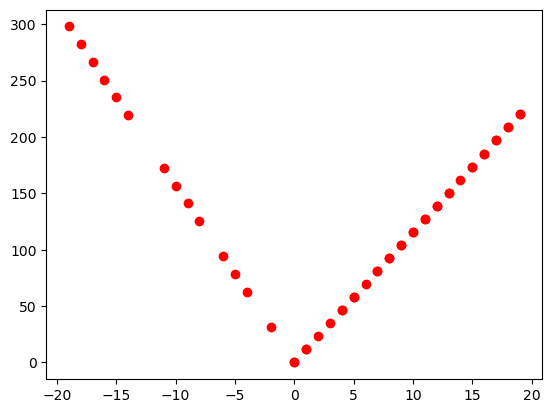

In [927]:
plt.scatter(xb, m.res, color='red')

In [928]:
import matplotlib.pyplot as plt

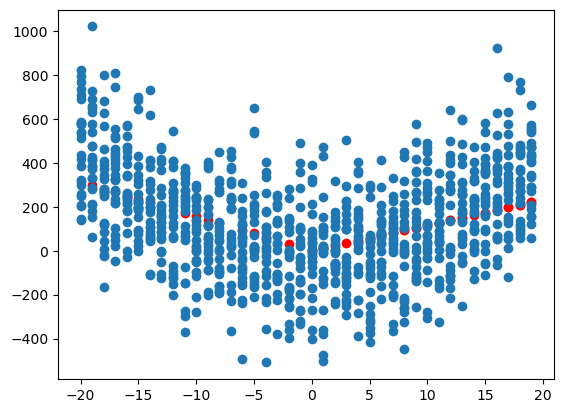

In [930]:
plt.scatter(xb, m.res, color='red')
plt.scatter(data.x, data.y)